In [14]:
def spec_augment(feat, T = 70, F = 20, time_mask_num = 2, freq_mask_num = 2):
    seq_len, feat_size = feat.shape

    # time mask
    for _ in range(time_mask_num):
        t = np.random.uniform(low=0.0, high=T)
        t = int(t)
        t0 = random.randint(0, seq_len - t)
        feat[t0 : t0 + t, :] = 0

    # freq mask
    for _ in range(freq_mask_num):
        f = np.random.uniform(low=0.0, high=F)
        f = int(f)
        f0 = random.randint(0, feat_size - f)
        feat[:, f0 : f0 + f] = 0

    return feat

In [ ]:
def log_spectrogram(wav):
    freqs, times, spec = stft(wav, SAMPLE_RATE, nperseg = 400, noverlap = 240, nfft = 512, 
                              padded = False, boundary = None)
    # Log spectrogram
    amp = np.log(np.abs(spec)+1e-10)
    
    return freqs, times, amp

In [ ]:
import torch

def get_spectrogram_feature(filepath):
    (rate, width, sig) = wavio.readwav(filepath)
    sig = sig.ravel()

    stft = torch.stft(torch.FloatTensor(sig),
                        N_FFT,
                        hop_length=int(0.01*SAMPLE_RATE),
                        win_length=int(0.030*SAMPLE_RATE),
                        window=torch.hamming_window(int(0.030*SAMPLE_RATE)),
                        center=False,
                        normalized=False,
                        onesided=True)

    stft = (stft[:,:,0].pow(2) + stft[:,:,1].pow(2)).pow(0.5);
    amag = stft.numpy();
    feat = torch.FloatTensor(amag)
    feat = torch.FloatTensor(feat).transpose(0, 1)

    return feat

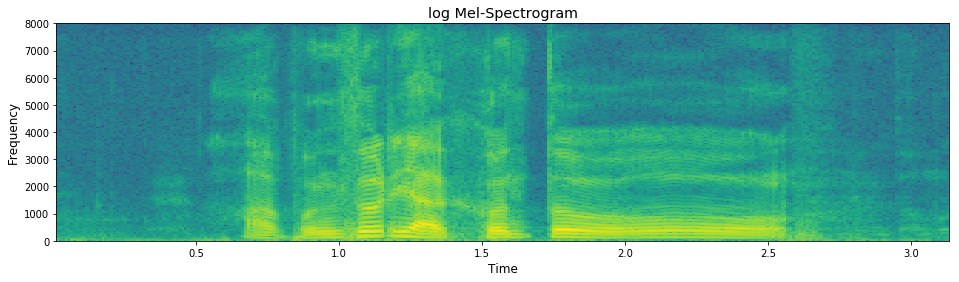

In [17]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
from scipy.signal import stft
import random
 
SAMPLE_RATE = 16000

pcm = np.memmap('KsponSpeech_000001.pcm', dtype='h', mode='r')
signal = np.array([float(x) for x in pcm])
freqs, times, amp = log_spectrogram(signal)
plt.figure(figsize=(16, 4))
plt.title('log Mel-Spectrogram', fontsize='x-large')
plt.xlabel('Time', fontsize='large')
plt.ylabel('Frequency', fontsize='large')
plt.imshow(amp, aspect='auto', origin='lower', extent=[times.min(), times.max(), freqs.min(), freqs.max()])

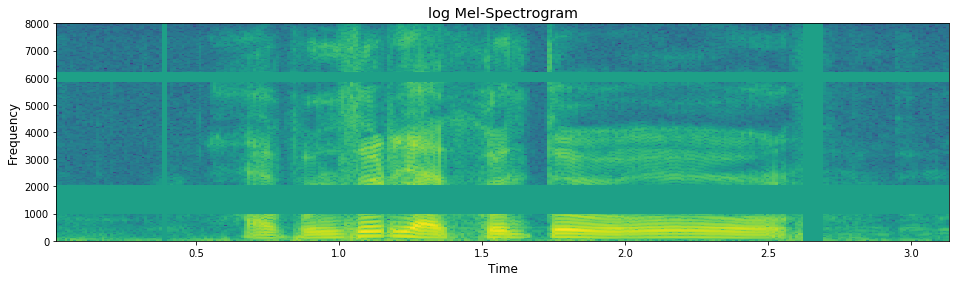

In [25]:
pcm = np.memmap('KsponSpeech_000001.pcm', dtype='h', mode='r')
signal = np.array([float(x) for x in pcm])
freqs, times, amp = log_spectrogram(signal)
amp = spec_augment(amp)
plt.figure(figsize=(16, 4))
plt.title('log Mel-Spectrogram', fontsize='x-large')
plt.xlabel('Time', fontsize='large')
plt.ylabel('Frequency', fontsize='large')
plt.imshow(amp, aspect='auto', origin='lower', extent=[times.min(), times.max(), freqs.min(), freqs.max()])